In [10]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import arepo
from tqdm import tqdm

In [11]:
snap_path = '/n/holystore01/LABS/hernquist_lab/Users/abeane/starbar_runs/runs/'
in_bar_path = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/gasbar/analysis/in_bar/data/'

In [12]:
def read_in_bar(name, lvl, idx, nchunk=256):
    fname_base = in_bar_path+'in_bar_'+name+'-'+lvl+'/in_bar_'+name+'-'+lvl+'.'
    
    out = {}
    out['PartType1'] = {}
    out['PartType1']['in_bar'] = []
    
    for i in tqdm(range(nchunk)):
        fname = fname_base + str(i) + '.hdf5'
        t = h5.File(fname, mode='r')
        # print(np.shape(t['PartType1']['in_bar'][idx]))
        out['PartType1']['in_bar'].append(t['PartType1']['in_bar'][idx])
        t.close()
    
    print(np.shape(out['PartType1']['in_bar']))
    out['PartType1']['in_bar'] = np.concatenate(out['PartType1']['in_bar'])
    
    return out

In [13]:
def read_snap(idx, name, lvl, parttype=[2, 3, 4], fields=['Coordinates', 'Masses']):
    sn = arepo.Snapshot(snap_path+name+'/'+lvl+'/output', idx, combineFiles=True, parttype=parttype,
                        fields=fields)
    return sn

In [14]:
in_bar_N = read_in_bar('Nbody', 'lvl3', 500)
in_bar_N_1000 = read_in_bar('Nbody', 'lvl3', 1000)
in_bar_S = read_in_bar('phantom-vacuum-Sg20-Rc3.5', 'lvl3', 300)
in_bar_S_1000 = read_in_bar('phantom-vacuum-Sg20-Rc3.5', 'lvl3', 1000)



  1%|          | 3/256 [00:00<00:15, 16.20it/s]

(256, 99015)


  1%|          | 2/256 [00:00<00:12, 19.78it/s]

(256, 99015)


  2%|▏         | 6/256 [00:00<00:05, 49.61it/s]

(256, 99015)


100%|██████████| 256/256 [00:04<00:00, 52.41it/s]

(256, 99015)


In [15]:
sn = read_snap(500, 'Nbody', 'lvl3', parttype=1, fields=None)
sn_1000 = read_snap(1000, 'Nbody', 'lvl3', parttype=1, fields=None)
snS = read_snap(300, 'phantom-vacuum-Sg20-Rc3.5', 'lvl3', parttype=1, fields=None)
snS_1000 = read_snap(1000, 'phantom-vacuum-Sg20-Rc3.5', 'lvl3', parttype=1, fields=None)

In [45]:
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
pos = sn.part1.pos.value - center

pos = pos[np.argsort(sn.part1.ParticleIDs)]

pos_in_bar = pos[in_bar_N['PartType1']['in_bar']]

In [46]:
print(len(pos_in_bar))

11255


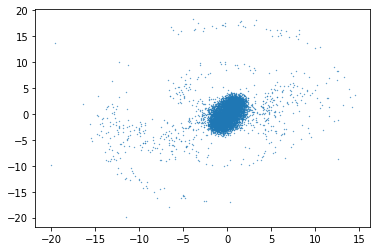

In [47]:
plt.scatter(pos_in_bar[:,0], pos_in_bar[:,1], s=0.1)
# plt.xlim(-6, 6)
# plt.ylim(-6, 6)

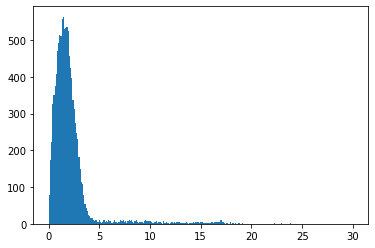

In [48]:
R = np.linalg.norm(pos_in_bar[:,:2], axis=1)
plt.hist(R, bins=np.linspace(0, 30, 256));

In [19]:
center = sn_1000.part1.pos.value[np.argmin(sn_1000.part1.pot)]
pos = sn_1000.part1.pos.value - center

pos = pos[np.argsort(sn_1000.part1.ParticleIDs)]

pos_in_bar = pos[in_bar_N_1000['PartType1']['in_bar']]

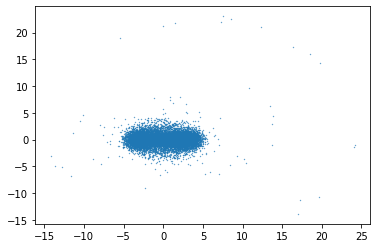

In [20]:
plt.scatter(pos_in_bar[:,0], pos_in_bar[:,1], s=0.1)
# plt.xlim(-6, 6)
# plt.ylim(-6, 6)

In [52]:
center = snS.part1.pos.value[np.argmin(snS.part1.pot)]
pos = snS.part1.pos.value - center

pos = pos[np.argsort(snS.part1.ParticleIDs)]

pos_in_bar = pos[in_bar_S['PartType1']['in_bar']]

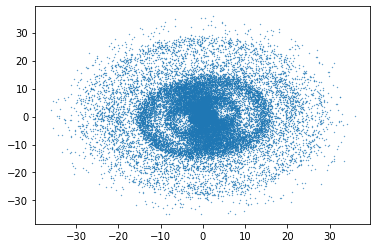

In [53]:
plt.scatter(pos_in_bar[:,0], pos_in_bar[:,1], s=0.1)
# plt.xlim(-6, 6)
# plt.ylim(-6, 6)

8273


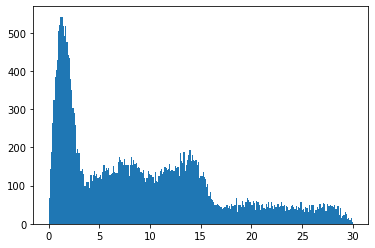

In [55]:
R = np.linalg.norm(pos_in_bar[:,:2], axis=1)
r = np.linalg.norm(pos_in_bar, axis=1)

print(len(np.where(r[r<2.67])[0]))

plt.hist(R, bins=np.linspace(0, 30, 256));

In [56]:
center = snS_1000.part1.pos.value[np.argmin(snS_1000.part1.pot)]
pos = snS_1000.part1.pos.value - center

pos = pos[np.argsort(snS_1000.part1.ParticleIDs)]

pos_in_bar = pos[in_bar_S_1000['PartType1']['in_bar']]

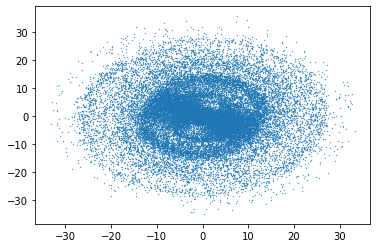

In [57]:
plt.scatter(pos_in_bar[:,0], pos_in_bar[:,1], s=0.1)
# plt.xlim(-6, 6)
# plt.ylim(-6, 6)

In [58]:
r = np.linalg.norm(pos_in_bar, axis=1)

print(len(np.where(r[r<2.67])[0]))

7474


In [25]:
t = h5.File('/n/holylfs05/LABS/hernquist_lab/Users/abeane/gasbar/analysis/phase_space/data/phantom-vacuum-Sg20-Rc3.5-lvl3/phase_space_phantom-vacuum-Sg20-Rc3.5-lvl3.0.hdf5', mode='r')
name = 'phantom-vacuum-Sg20-Rc3.5'
lvl = 'lvl3'
t_in_bar = h5.File(in_bar_path+'in_bar_'+name+'-'+lvl+'/in_bar_'+name+'-'+lvl+'.0.hdf5', mode='r')

t_bar_metr = h5.File('/n/holylfs05/LABS/hernquist_lab/Users/abeane/gasbar/analysis/bar_orbits/data/bar_orbit_phantom-vacuum-Sg20-Rc3.5-lvl3/bar_orbit_phantom-vacuum-Sg20-Rc3.5-lvl3.0.hdf5', mode='r')


In [33]:
tN = h5.File('/n/holylfs05/LABS/hernquist_lab/Users/abeane/gasbar/analysis/phase_space/data/Nbody-lvl3/phase_space_Nbody-lvl3.0.hdf5', mode='r')
name = 'Nbody'
lvl = 'lvl3'
t_in_bar_N = h5.File(in_bar_path+'in_bar_'+name+'-'+lvl+'/in_bar_'+name+'-'+lvl+'.0.hdf5', mode='r')

t_bar_metr_N = h5.File('/n/holylfs05/LABS/hernquist_lab/Users/abeane/gasbar/analysis/bar_orbits/data/bar_orbit_Nbody-lvl3/bar_orbit_Nbody-lvl3.0.hdf5', mode='r')


In [26]:
r = np.linalg.norm(t['PartType1']['Coordinates'][:,500,:]-np.array([200.,200.,200.]), axis=1)

key = np.logical_and(t_in_bar['PartType1']['in_bar'][500], r>8)
print(np.where(key)[0])
# t['PartType1']['Coordinates']

[  255   880  1649  2331  5265  5419  7445 11361 12944 14681 15729 16095
 17717 20109 20861 22509 22520 24411 28757 28886 29299 29495 30578 32170
 35187 36185 37181 38670 40096 42716 42792 46505 47349 47862 53856 54280
 55782 56285 59860 60959 64354 64855 65543 66645 67271 72803 74176 75397
 75867 76975 77790 81712 82133 82379 82914 84382 85384 85434 86063 87140
 89826 91745 92163 93777 94800 95310 96487 97702 98212 98836]


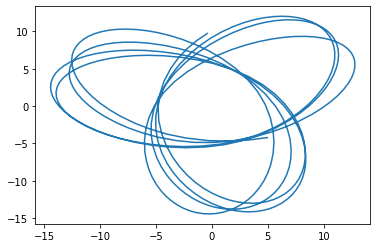

In [27]:
pos = t['PartType1']['Coordinates'][255,300:700,:] - np.array([200., 200., 200.])

plt.plot(pos[:,0], pos[:,1])

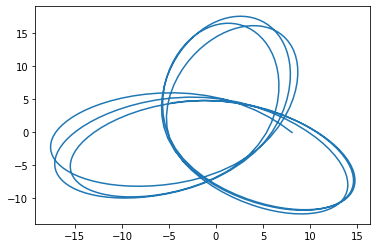

In [39]:
pos = tN['PartType1']['Coordinates'][255,300:700,:]

plt.plot(pos[:,0], pos[:,1])

In [37]:
t['PartType1']['ParticleIDs'][255]

256

In [29]:
metr = t_bar_metr['PartType1']['bar_metrics']['256'][13]

In [31]:
print(metr[1], np.pi/8.)
print(metr[2]/metr[3], 0.22)
print(metr[4], np.pi/8)

0.2964612513516905 0.39269908169872414
0.024575407781194634 0.22
0.25395551854086107 0.39269908169872414


In [35]:
metrN = t_bar_metr_N['PartType1']['bar_metrics']['256'][13]

In [36]:
print(metrN[1], np.pi/8.)
print(metrN[2]/metrN[3], 0.22)
print(metrN[4], np.pi/8)

0.8863628984126268 0.39269908169872414
0.02804060170333662 0.22
0.39501215103740905 0.39269908169872414


In [78]:
1/(2*0.005)

100.0

### bar orbit

In [1]:
def get_bar_angle(phi, firstkey):
    out = np.zeros(len(phi))

    # set the first bar angle
    first_bar_angle = phi[firstkey]/2.0
    out[firstkey] = first_bar_angle
    
    # set all subsequent angles
    for i in np.arange(firstkey+1, len(out)):
        dphi = phi[i] - phi[i-1]
        if dphi < -np.pi:
            dphi += 2.*np.pi
        out[i] = out[i-1] + dphi/2.0

    # set all previous angles to be the bar angle
    for i in np.arange(0, firstkey):
        out[i] = first_bar_angle

    return out

def get_sorted_keys(dat):
    keys = list(dat.keys())
    # only keep keys that are snapshot keys
    keys = [k for k in keys if 'snapshot' in k]

    # extract and sort indices
    indices = [int(re.findall(r'\d?\d?\d\d\d', k)[0]) for k in keys]
    sorted_arg = np.argsort(indices)
    keys_sorted = [keys[i] for i in sorted_arg]

    return keys_sorted

def get_A2_angle(dat, keys, Rbin):
    Rlist = np.array([np.array(dat[k]['Rlist']) for k in keys])
    A2r = np.array([np.array(dat[k]['A2r']) for k in keys])
    A2i = np.array([np.array(dat[k]['A2i']) for k in keys])
    phi = np.arctan2(A2i, A2r)
    phi = phi[:,Rbin]
    R_at_Rbin = Rlist[:,Rbin]
    
    time = np.array(dat['time'])

    return time, R_at_Rbin, phi

def get_bar_length(dat, keys, Rmin=2, Rmax=10, ratio_cut = 2):
    Rlist = np.array([np.array(dat[k]['Rlist']) for k in keys])

    A0 = np.array([np.array(dat[k]['A0']) for k in keys])
    A1r = np.array([np.array(dat[k]['A1r']) for k in keys])
    A1i = np.array([np.array(dat[k]['A1i']) for k in keys])
    A2r = np.array([np.array(dat[k]['A2r']) for k in keys])
    A2i = np.array([np.array(dat[k]['A2i']) for k in keys])
    A3r = np.array([np.array(dat[k]['A3r']) for k in keys])
    A3i = np.array([np.array(dat[k]['A3i']) for k in keys])
    A4r = np.array([np.array(dat[k]['A4r']) for k in keys])
    A4i = np.array([np.array(dat[k]['A4i']) for k in keys])
    A5r = np.array([np.array(dat[k]['A5r']) for k in keys])
    A5i = np.array([np.array(dat[k]['A5i']) for k in keys])
    A6r = np.array([np.array(dat[k]['A6r']) for k in keys])
    A6i = np.array([np.array(dat[k]['A6i']) for k in keys])
    
    I0 = A0/2.
    I1 = np.sqrt(A1r*A1r + A1i*A1i)
    I2 = np.sqrt(A2r*A2r + A2i*A2i)
    I3 = np.sqrt(A3r*A3r + A3i*A3i)
    I4 = np.sqrt(A4r*A4r + A4i*A4i)
    I5 = np.sqrt(A5r*A5r + A5i*A5i)
    I6 = np.sqrt(A6r*A6r + A6i*A6i)
    
    Ib = I0 + I2 + I4 + I6
    Iib = I0 - I2 + I4 - I6
    
    IbIib = Ib/Iib
    
    Rbar_list = []
    for i,k in enumerate(keys):
        R = Rlist[i,:]
        ratio = IbIib[i,:]
        
        Rkey = np.logical_and(R > Rmin, R< Rmax)
        ratio = ratio[Rkey]
        R = R[Rkey]
        j = 0
        try:
            while ratio[j] > ratio_cut:
                j += 1
            Rbar = R[j-1] + (ratio_cut - ratio[j-1]) * (R[j]-R[j-1])/(ratio[j]-ratio[j-1])
        except:
            Rbar = np.nan
        Rbar_list.append(Rbar)

    time = np.array(dat['time'])    
    
    return time, np.array(Rbar_list)

def evaluate_polynomial(pfit, n, time, bar_angle_firstkey, firstkey):
    pfit_n = pfit[n]
    poly_bar_angle = np.zeros(len(time))
    poly_pattern_speed = np.zeros(len(time))

    for i in range(n+1):
        ba = pfit_n[i] * time ** (n-i)
        poly_bar_angle[firstkey:] += ba[firstkey:]
        ps = (n-i) * pfit_n[i] * time**(n-1-i)
        poly_pattern_speed[firstkey:] += ps[firstkey:]

    poly_bar_angle[:firstkey] += bar_angle_firstkey

    poly_pattern_speed = poly_pattern_speed / u.Myr
    poly_pattern_speed = poly_pattern_speed.to_value(u.km/u.s/u.kpc)

    return poly_bar_angle, poly_pattern_speed

def main_bar_angle(dat, Rbin = 5, firstkey = 150, nmax = 10):
    out = {}

    keys = get_sorted_keys(dat)
    time, R, phi = get_A2_angle(dat, keys, Rbin)
    time, Rbar = get_bar_length(dat, keys)
    #     Rlist, Iibar = get_bar_length(dat, keys)
    bar_angle = get_bar_angle(phi, firstkey)

    pattern_speed = np.gradient(bar_angle, time) / u.Myr
    pattern_speed = pattern_speed.to_value(u.km/u.s/u.kpc)

    pfit = [np.polyfit(time[firstkey:], bar_angle[firstkey:], i) for i in range(nmax)]
    
    out['time'] = time
    out['firstkey'] = firstkey
    out['R'] = R
    out['Rbar'] = Rbar
    out['phi'] = phi
    out['bar_angle'] = bar_angle
    out['pattern_speed'] = pattern_speed
    out['pfit'] = pfit

    # now evaluate the polynomial for each fit and save the result
    out['poly_eval'] = {}
    for n in range(nmax):
        poly_bar_angle, poly_pattern_speed = evaluate_polynomial(pfit, n, time, bar_angle[firstkey], firstkey)

        out['poly_eval'][n] = (poly_bar_angle, poly_pattern_speed)

    return out

In [11]:
def rotate_w(w, ang):

    Rmat = np.array([[np.cos(ang), -np.sin(ang), 0.0],
                     [np.sin(ang), np.cos(ang),  0.0],
                     [0.0,         0.0,          1.0]])
    w = np.swapaxes(w, 0, 1)

    w[:3,:] = np.matmul(Rmat, w[:3,:])
    w[3:,:] = np.matmul(Rmat, w[3:,:])

    w = np.swapaxes(w, 0, 1)
    return w

# rotate by bar angle at each time step

def rotate_wlist(wlist, bar_angle_out, idx_list):
    bar_angle = np.mod(bar_angle_out['bar_angle'][idx_list], 2.*np.pi)

    Rwlist = np.zeros(np.shape(wlist))

    for i,idx in enumerate(tqdm(idx_list)):
        Rwlist[i] = rotate_w(wlist[i], -bar_angle[i])
    
    return Rwlist

In [2]:
def read_fourier(name, basepath='/n/holylfs05/LABS/hernquist_lab/Users/abeane/gasbar/analysis/'):
    f = h5.File(basepath+'/fourier_component/data/fourier_' + name + '.hdf5', mode='r')
    return f

In [3]:
name = 'phantom-vacuum-Sg20-Rc3.5-lvl3'
import re
import astropy.units as u

In [6]:
fourier = read_fourier(name)
bar_angle_out = main_bar_angle(fourier, firstkey=0)

<ipython-input-1-a8978122accd>:104: RuntimeWarning: divide by zero encountered in reciprocal
  ps = (n-i) * pfit_n[i] * time**(n-1-i)
<ipython-input-1-a8978122accd>:104: RuntimeWarning: invalid value encountered in multiply
  ps = (n-i) * pfit_n[i] * time**(n-1-i)


In [8]:
center = np.array([200., 200., 200.])

In [13]:
h5in = h5.File('/n/holylfs05/LABS/hernquist_lab/Users/abeane/gasbar/analysis/phase_space/data/phantom-vacuum-Sg20-Rc3.5-lvl3/phase_space_phantom-vacuum-Sg20-Rc3.5-lvl3.0.hdf5', mode='r')

pt = 1
pos = np.array(h5in['PartType'+str(pt)+'/Coordinates'])
vel = np.array(h5in['PartType'+str(pt)+'/Velocities'])
ids = np.array(h5in['PartType'+str(pt)+'/ParticleIDs'])

indices = np.array(h5in['Time'])
indices = np.arange(len(indices))
    
pos -= center
w = np.concatenate((pos, vel), axis=-1)
w = np.swapaxes(w, 0, 1)

Rwlist = rotate_wlist(w, bar_angle_out, indices)

100%|██████████| 1600/1600 [00:38<00:00, 41.94it/s]


In [ ]:
255   880  1649  2331  5265  5419  7445 11361 12944 14681 15729 16095
 17717 20109 20861 22509 22520 24411 28757 28886 29299 29495 30578 32170
 35187 36185 37181 38670 40096 42716 42792 46505 47349 47862 53856 54280
 55782 56285 59860 60959 64354 64855 65543 66645 67271 72803 74176 75397
 75867 76975 77790 81712 82133 82379 82914 84382 85384 85434 86063 87140
 89826 91745 92163 93777 94800 95310 96487 97702 98212 98836

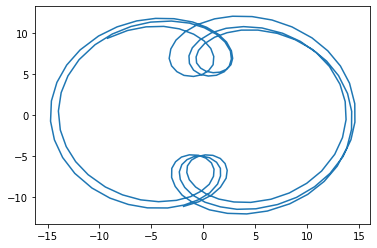

In [56]:
myw = Rwlist[:,255]
plt.plot(myw[400:600,0], myw[400:600,1])

In [52]:
metr = t_bar_metr['PartType1']['bar_metrics']['12945'][7]
metr[0]

526.0

In [53]:
print(metr[1], np.pi/8.)
print(metr[2]/metr[3], 0.22)

0.36379885010941776 0.39269908169872414
0.12481654508257607 0.22


### pos_ib radial distribution

In [8]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/gasbar/'
in_bar_path = basepath + '/analysis/in_bar/data/'
phase_space_path = basepath + '/analysis/phase_space/data/'

nchunk = 256

def get_pos_ib(name, lvl, idx):

    pos_ib = []

    for i in tqdm(range(nchunk)):
        h5ib = h5.File(in_bar_path + 'in_bar_'+name+'-'+lvl+'/in_bar_'+name+'-'+lvl+'.'+str(i)+'.hdf5', mode='r')
        h5ps = h5.File(phase_space_path +name+'-'+lvl+'/phase_space_'+name+'-'+lvl+'.'+str(i)+'.hdf5', mode='r')
    
        pos_ib.append( h5ps['PartType1/Coordinates'][:,idx,:][h5ib['PartType1/in_bar'][idx]] )
    
        h5ib.close()
        h5ps.close()

    pos_ib = np.concatenate(pos_ib)
    
    return pos_ib


In [40]:
pos_ib_Nbody = get_pos_ib('Nbody', 'lvl3', 500)

100%|██████████| 256/256 [16:38<00:00,  3.90s/it]


In [41]:
pos_ib_SMUGGLE = get_pos_ib('phantom-vacuum-Sg20-Rc3.5', 'lvl3', 200)

  0%|          | 0/256 [00:04<?, ?it/s]


KeyboardInterrupt: 

In [67]:
def read_in_bar(name, lvl, idx, nchunk=256):
    fname_base = in_bar_path+'in_bar_'+name+'-'+lvl+'/in_bar_'+name+'-'+lvl+'.'
    
    out = {}
    out['PartType1'] = {}
    out['PartType1']['in_bar'] = []
    
    for i in tqdm(range(nchunk)):
        fname = fname_base + str(i) + '.hdf5'
        t = h5.File(fname, mode='r')
        print(np.shape(t['PartType1']['in_bar']))
        out['PartType1']['in_bar'].append(t['PartType1']['in_bar'][:])
        t.close()
    
    # print(np.shape(out['PartType1']['in_bar']))
    out['PartType1']['in_bar'] = np.concatenate(out['PartType1']['in_bar'], axis=1)
    
    return out

In [68]:
in_bar_N = read_in_bar('Nbody', 'lvl3', 0, nchunk=16)

 12%|█▎        | 2/16 [00:00<00:01,  9.13it/s]

(1601, 99015)
(1601, 99015)
(1601, 99015)
(1601, 99015)


 44%|████▍     | 7/16 [00:00<00:00, 10.43it/s]

(1601, 99015)
(1601, 99015)
(1601, 99015)
(1601, 99015)
(1601, 99015)

 81%|████████▏ | 13/16 [00:01<00:00, 10.68it/s]


(1601, 99015)
(1601, 99015)
(1601, 99015)
(1601, 99015)
(1601, 99015)
(1601, 99015)


100%|██████████| 16/16 [00:01<00:00, 10.51it/s]


(1601, 99015)


In [69]:
in_bar_N['PartType1']['in_bar'].shape

(1601, 1584240)